In [1]:
import matplotlib.pyplot as plt 
import csv
import numpy as np

In [5]:
def csv2dataset(fileName):
    dataset = {}
    dataset_columns = []

    with open(fileName) as csvfile:
        results = csv.reader(csvfile,delimiter=',',skipinitialspace=True)
        header = True
        for row in results:
            
            if header:
                for colName in row:
                    #print(f'\t{type(colName)} {colName}')
                    dataset[colName] = []
                    dataset_columns.append(colName)
                #print(dataset)
                #print(dataset_columns)
                header = False
                continue
        
            for i in range(len(row)):
                colValue = row[i]
                #print(f"{ type(colValue)} {colValue}")
                floatValue = float(colValue)
                #print(f"{ type(floatValue)} {floatValue}")
                dataset[dataset_columns[i]].append(floatValue)
            #break
        #print(dataset)
        # for col in dataset:
            # print(f"{col} {dataset[col]}")
    
    return dataset, dataset_columns

In [7]:
def plotResults(dataset):

    x = dataset['epoch']
    y_columns = ['train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'val/box_loss', 'val/obj_loss', 'val/cls_loss', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95',  'x/lr0', 'x/lr1', 'x/lr2']

    fig, axs = plt.subplots(2, 5, figsize=(12, 6), layout='constrained')
    firstSubPlot = True
    for ax, metric in zip(axs.flat, y_columns):
        ax.set_title(f'{metric}')
        y = dataset[metric]
        window_size = 10
        y_smooth = np.convolve(y, np.ones(window_size) / window_size, mode='same')
        valid_range = window_size // 2
        ax.plot(x, y, 'o', ls='-', ms=2, label='results')
        ax.plot(x[valid_range:-valid_range], y_smooth[valid_range:-valid_range], label='smooth', color='orange', linestyle='dotted', linewidth=2)
        if firstSubPlot:
            ax.legend()
            firstSubPlot = False

In [6]:
# csvFileName = './yolov5/runs/train/exp13/results.csv'
csvFileName = './yolov5/runs/train/exp15/results.csv'

csv300          ='/home/landreotti/tcc/expiry-date-detection-YOLO/resultados-tcc/train/300/results_300.csv'
csv300_DataAug  ='/home/landreotti/tcc/expiry-date-detection-YOLO/resultados-tcc/train/300+DataAug/results_300+DataAug.csv'

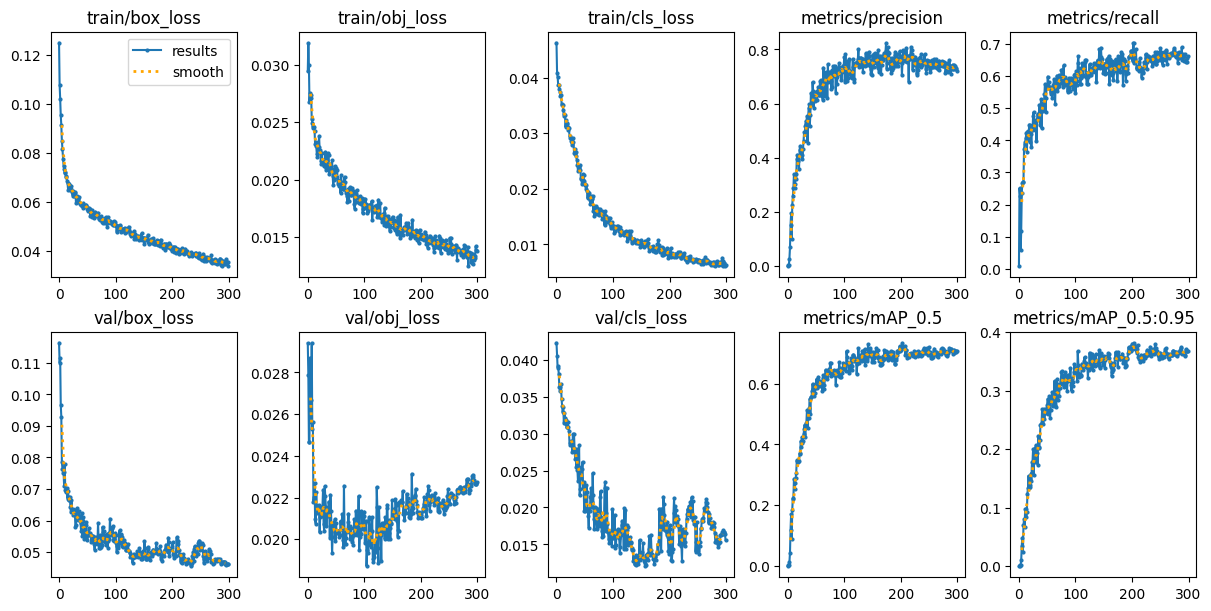

In [8]:
dataset, dataset_columns = csv2dataset(csv300)
plotResults(dataset)

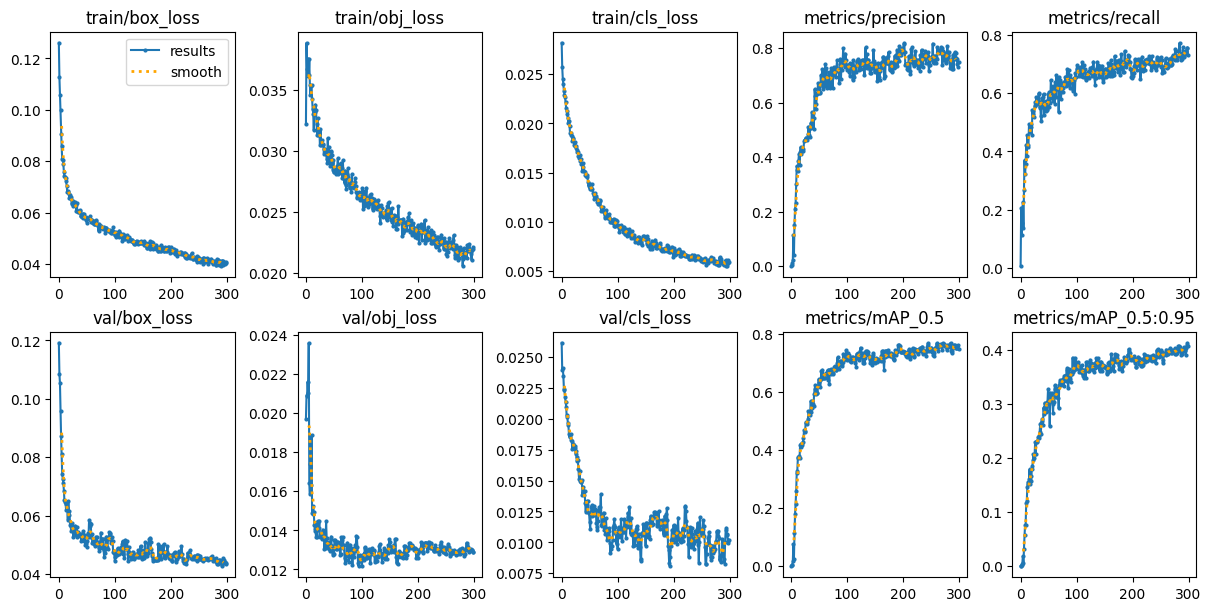

In [9]:
dataset, dataset_columns = csv2dataset(csv300_DataAug)
plotResults(dataset)